# <b>Predicting Heart Disease with Machine Learning</b>

<i>A Data Science project for CoderGirl using the <b>Heart Disease UCI dataset</b>: <a href="https://www.kaggle.com/ronitf/heart-disease-uci" target="_blank">https://www.kaggle.com/ronitf/heart-disease-uci</a></i>

<img src="/images/heart-image.jpg" width="600">

### <b>Abstract</b>

The purpose of this exercise was to complete the steps involved in a typical data science project. With the assignment of the Heart Disease UCI dataset, the aim was to develop a machine learning model to predict whether a patient has heart disease or not. Insights gleaned from exploratory data analysis revealed a fairly balanced dataset in terms of disease/no disease. This was categorized as a <i>supervised learning</i> problem because the dataset was labeled. Furthermore, it was a <i>binary classification</i> problem since the goal was to train a model to predict a discrete value of either 0 or 1. Model exploration included K-Nearest Neighbors, Logistic Regression, and Random Forest. The KNN model had the best performance with an F1 score of .92 and an accuracy of 91.8%.

<b>Dataset Background</b> 

In its entirety, the Cleveland database contains 76 attributes and classifies patients based on the absence or presence of heart disease. However, for this project, a subset was used with the following 14 attributes: 
- Age (age in years)
- Sex (0 = female; 1 = male)
- CP (chest pain type)
- TRESTBPS (resting blood pressure in mm Hg on admission to the hospital)
- CHOL (serum cholesterol in mg/dl)
- FPS (fasting blood sugar >120 mg/d; 0 = false; 1 = true)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina; 0 = no; 1 = yes)
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by fluoroscopy)
- THAL (listed online as 3 = normal, 6 = fixed defect, 7 = reversible defect; however, values are 0, 1, 2, 3)
- TARGET (0 = no disease; 1 = heart disease)  
<br/>
***  


## <b>Summary of Exploratory Data Analysis</b>
The full EDA notebook is available at:  
https://github.com/Veronica1007/mini-project/blob/master/Heart_Disease_Mini-Project_phase_1_FINAL.ipynb  

#### <b>First Steps</b>

A handful of Python packages for data analysis and visualization were loaded, and then the data was imported as a Pandas DataFrame. 

In [1]:
# import packages for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the dataset
heart = pd.read_csv('heart.csv')

<br/>Next, the shape, head, and info about the DataFrame were viewed. From that I learned: 
* There were 303 observations, which is considered a small dataset.
* The data types were mostly integers; however, OLDPEAK was a float.
* There were no missing values.

In [3]:
# see shape of the data
heart.shape

(303, 14)

In [4]:
# view head dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# get info on dataframe
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<br/>A quick check for duplicates (with Pandas `.duplicated` method) revealed one duplicate record, which was removed. This left a total of 302 observations.

In [6]:
# check for duplicate observations
heart[heart.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
# drop duplicate observation
heart = heart.drop_duplicates()

In [8]:
# view updated shape; should be 302 rows with the duplicate removed
heart.shape

(302, 14)

#### <br/><b>Statistics</b>

Pandas `.describe` method was used to show basic stastical details for each feature. The `.groupby` method provided additional insight for each feature by target (disease/no disease).

In [9]:
# describe statistical insights
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# groupby target and then view means to see average value for no disease vs. disease
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [11]:
# groupby target and then view medians to see median value for no disease vs. disease
heart.groupby('target').median()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,58.0,1.0,0.0,130.0,249.0,0.0,0.0,142.0,1.0,1.4,1.0,1.0,3.0
1,52.0,1.0,2.0,130.0,234.5,0.0,1.0,161.0,0.0,0.2,2.0,0.0,2.0


#### <br/><b>Data Vizualization: First Glance</b>

A histogram plot was used to observe the frequency distribution for each attribute. CHOL and OLDPEAK had a small number of potential outliers. However, I opted to leave those in the dataset because I didn't have enough information to determine if those were data entry errors or actual values. 

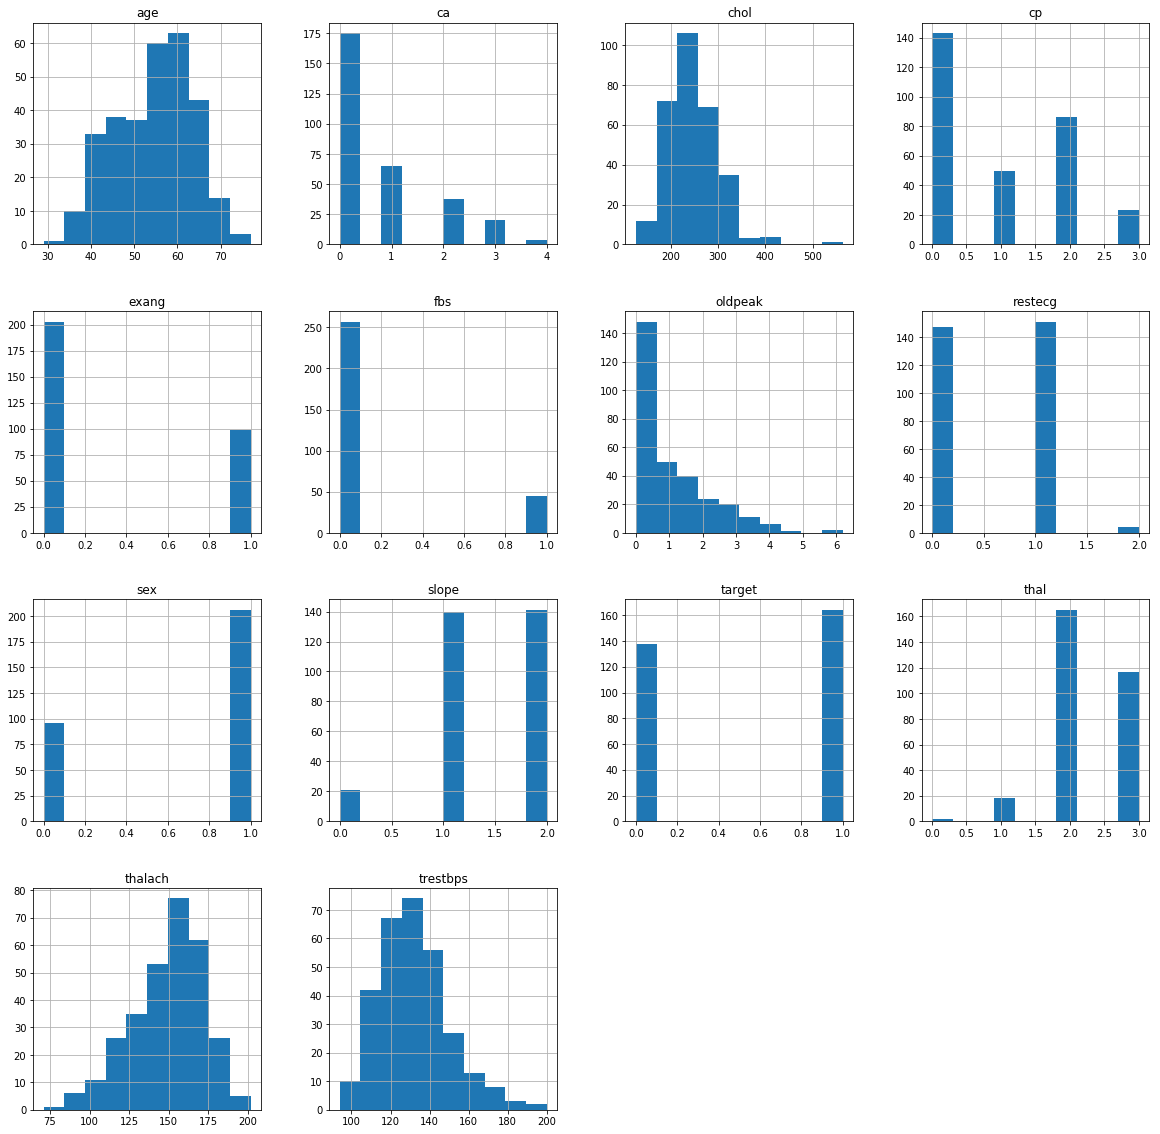

In [12]:
# plot histogram of dataframe
heart.hist(figsize=(20, 20));

<br/>Next, a correlation maxtrix and heatmap were constructed to visualize possible correlations. 

CP (chest pain) and THALACH (maximum heart rate achieved) had the highest correlation values in relation to TARGET, .43 and .42 respectively. 

In [13]:
# generate a correlation matrix
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


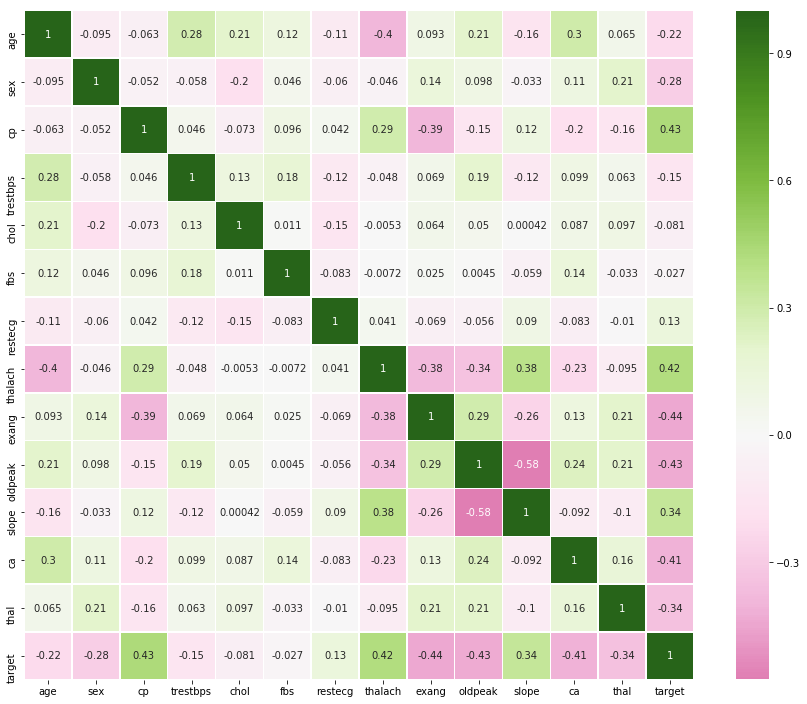

In [14]:
# plot the correlation matrix as a heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(heart.corr(), annot=True, cmap="PiYG", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .82})

#### <br/><b>Data Vizualization: A Closer Look</b>

After a couple `.value_counts()` and a myriad of plots, a better understand of the data emerged. Several key points were:
* This is a fairly balanced dataset:<br/>
-- 164 cases of heart disease (54.3%)<br/>
-- 138 cases of no disease (45.7%)

* The male to female ratio is approximately 2:1.

* Features such as age, resting blood pressure, and cholesterol were not as indicative of heart disease as I had expected. However, chest pain, the number of major blood vessels colored by fluoroscopy, and the THAL attribute appeared to be more closely correlated to heart disease.

<i>Note: Only a sampling of plots are included in this summary. The full EDA notebook is available at:<br/>
https://github.com/Veronica1007/mini-project/blob/master/Heart_Disease_Mini-Project_phase_1_FINAL.ipynb</i>

In [15]:
# count of males (1) and females (0)
heart.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

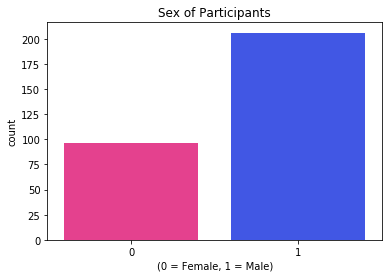

In [16]:
# plot of males (1) and females (0)
mf_colors = ["#FF268C", "#2643FF"]
sns.set_palette(mf_colors)
sns.countplot(heart.sex)
plt.title('Sex of Participants')
plt.xlabel('(0 = Female, 1 = Male)')
plt.show();

In [17]:
# count of disease (1) and no disease (0)
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

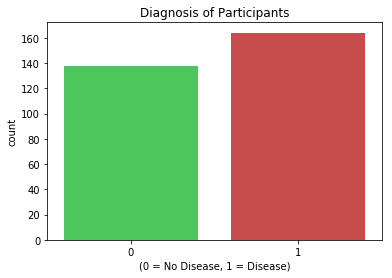

In [18]:
# plot of disease (1) and no disease (0)
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.countplot(heart.target)
plt.title("Diagnosis of Participants")
plt.xlabel('(0 = No Disease, 1 = Disease)')
plt.show();

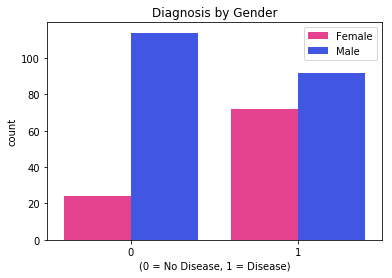

In [19]:
# plot of disease (1) and no disease (0) by sex
sns.set_palette(mf_colors)
sns.countplot(heart.target, hue=heart.sex)
plt.title("Diagnosis by Gender")
plt.xlabel('(0 = No Disease, 1 = Disease)')
plt.legend(["Female", "Male"])
plt.show();

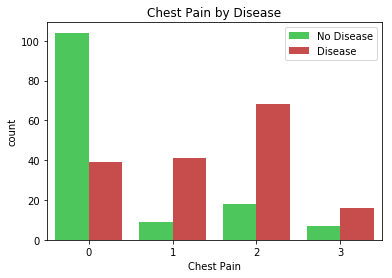

In [20]:
# plot cp (chest paint) by target
sns.set_palette(target_colors)
sns.countplot(heart.cp, hue=heart.target)
plt.title("Chest Pain by Disease")
plt.xlabel("Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.show();

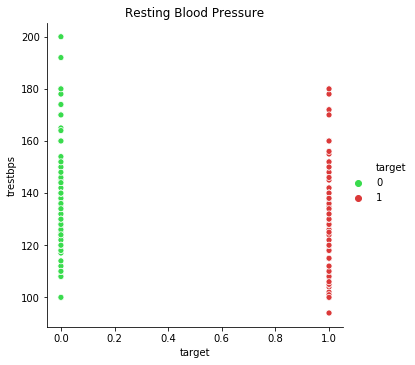

In [21]:
# plot trestbps (resting blood pressure)
sns.set_palette(target_colors)
sns.relplot(x="target", y="trestbps", hue="target", data=heart)
plt.title("Resting Blood Pressure");

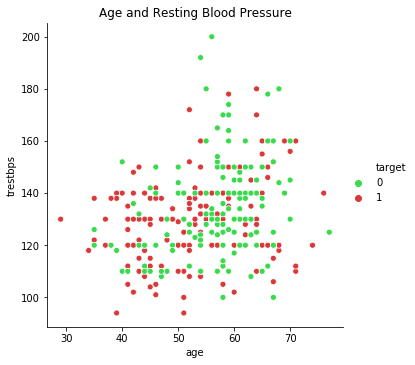

In [22]:
# plot trestbps (resting blood pressure) and age
sns.set_palette(target_colors)
sns.relplot(x="age", y="trestbps", hue="target", data=heart)
plt.title("Age and Resting Blood Pressure");

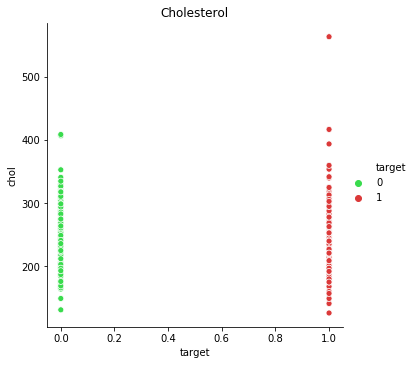

In [23]:
# plot chol (cholesterol)
sns.set_palette(target_colors)
sns.relplot(x="target", y="chol", hue="target", data=heart)
plt.title("Cholesterol");

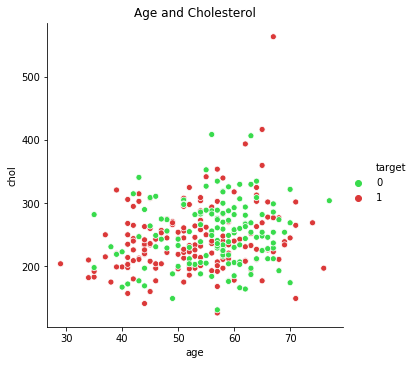

In [24]:
# plot chol (cholesterol) and age
sns.set_palette(target_colors)
sns.relplot(x="age", y="chol", hue="target", data=heart)
plt.title("Age and Cholesterol");

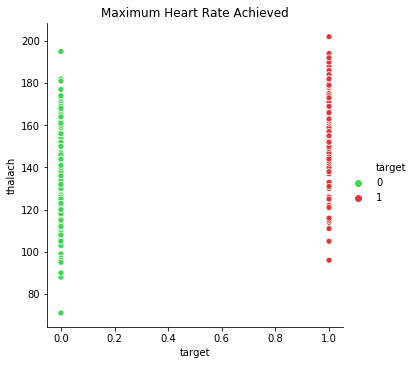

In [25]:
# plot thalach (maximum heart rate achieve)
sns.set_palette(target_colors)
sns.relplot(x="target", y="thalach", hue="target", data=heart)
plt.title("Maximum Heart Rate Achieved");

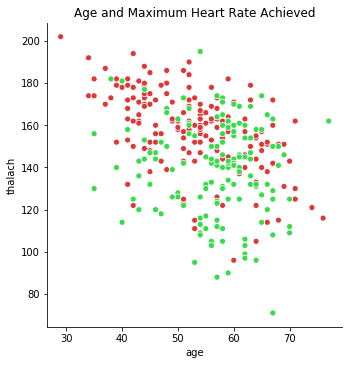

In [26]:
# plot thalach (maximum heart rate achieve) by age
sns.set_palette(target_colors)
g = sns.relplot(x="age", y="thalach", hue="target", data=heart, legend=False)
plt.title("Age and Maximum Heart Rate Achieved");

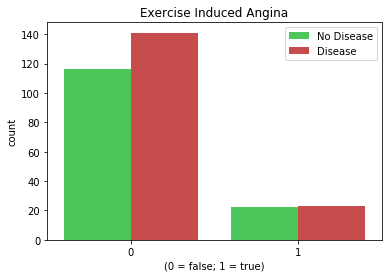

In [27]:
# plot exang (execrise induced angina)
sns.set_palette(target_colors)
sns.countplot(heart.fbs, hue=heart.target)
plt.title("Exercise Induced Angina")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()

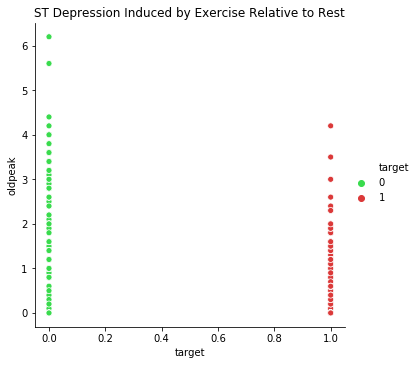

In [28]:
# plot oldpeak (ST depression induced by exercise)
sns.set_palette(target_colors)
sns.relplot(x="target", y="oldpeak", hue="target", data=heart)
plt.title("ST Depression Induced by Exercise Relative to Rest");

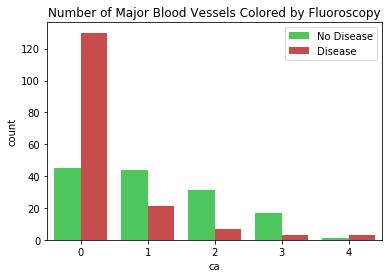

In [29]:
# plot ca (number of major blood vessels colored)
sns.set_palette(target_colors)
sns.countplot(heart.ca, hue=heart.target)
plt.title("Number of Major Blood Vessels Colored by Fluoroscopy")
plt.legend(["No Disease", "Disease"])
plt.show()

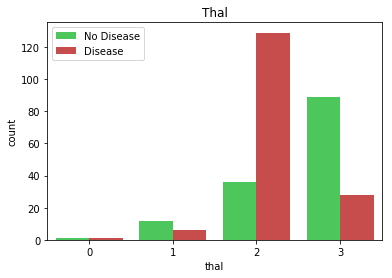

In [30]:
# plot thal
sns.set_palette(target_colors)
sns.countplot(heart.thal, hue=heart.target)
plt.title("Thal")
plt.legend(["No Disease", "Disease"])
plt.show()

***


## <b>Summary of Model Exploration</b>
The full model exploration notebook is available at:<br/>
https://github.com/Veronica1007/mini-project/blob/master/Heart_Disease_Mini-Project_phase_2_FINAL.ipynb 

<br/><b>Overview of Model Selection and Evaluation</b>

This was a <i>supervised learning</i> problem since the dataset included labels. It was also a <i>binary classification</i> problem since the goal was to train a model to predict a discrete value indicating whether a patient had heart disease or not. Therefore, the algorithms selected were K-Nearest Neighbors, Logistic Regression, and Random Forest.

Once each model was trainined, performance was evaluated on the following metrics: accuracy score, classification report, and confusion matrix. The receiver operating characteristic (ROC) curve was plotted, and a validation score was also computed for each model. Finally, the hyperameters were tuned using a grid search.

<br/><b>Packages Imported</b>

The necessary libraries for preprocessing, machine learning, and evaluation were imported.

In [31]:
# import ML packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for logistic regression
from sklearn.linear_model import LogisticRegression

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for permutation importance
import eli5
from eli5.sklearn import PermutationImportance

<br /><b>Preprocessing</b>

Prior to feature scaling, the heart DataFrame was split into two DataFrames: heart_data and heart_labels. Since the features were in different scales, `StandarScaler` was applied to the data.

In [32]:
# split dataset into data and labels
heart_data = heart.drop(columns="target")
heart_labels = heart.iloc[:,-1]

In [33]:
# use StandardScaler on the data
scaler = StandardScaler()
scaler.fit(heart_data)
heart_scaled = scaler.transform(heart_data)

C:\Users\veron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\veron\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<br /><b>Training/Testing Split</b>

Scikit Learn's `train_test_split` was used for an 80/20 train/test split. The size of the split was verified with `len()`.

In [34]:
# split dataset for training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(heart_scaled, heart_labels, test_size=0.20, random_state=42)

In [35]:
# view shape of train and test splits
# since the dataset has 302 observations, an 80/20 train/test split should be about 242/60 or 241/61 (depending on rounding)
print("Training observations:", len(X_train))
print("Testing observations:", len(X_test))


Training observations: 241
Testing observations: 61


### <br/><b>Model: K-Nearest Neighbors</b>

<b>Optimal K Value</b>

The elbow method was used to identify an optimal K value.

In [36]:
# calculating the error for K values 1-49
error_vals = []
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    knn_predict = knn_model.predict(X_test)
    error_vals.append(np.mean(knn_predict != Y_test))

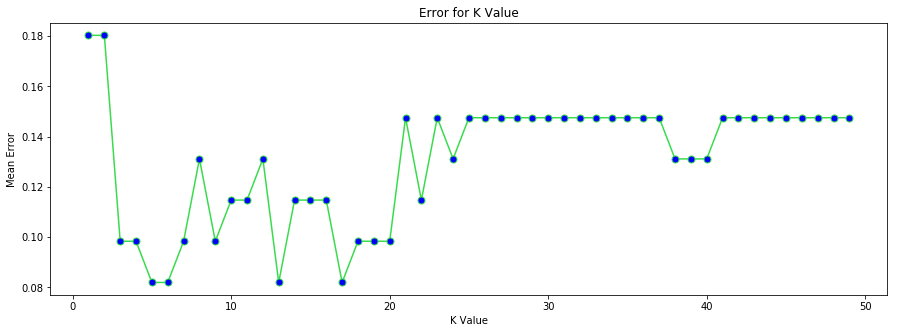

In [37]:
# plot the error for each K value
plt.figure(figsize=(15, 5))
plt.plot(range(1, 50), error_vals, marker="o", markerfacecolor="blue", markersize=7)
plt.title("Error for K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()         

<b>Model Created</b><br/>

The graph above indicated that a K value of 5, 13, or 17 might yield the best results since those are odd numbers and have the lowest error.

In [38]:
# create the classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_model.fit(X_train, Y_train)

# predict the outputs
knn_predict = knn_model.predict(X_test)

<br/><b>Model Evaluated</b>


In [39]:
# evalute the accuracy
knn_accuracy = round(accuracy_score(Y_test, knn_predict)*100, 2)
knn_f1 = round(f1_score(Y_test, knn_predict, average="weighted"), 2)

# print the results
print("K-Nearest Neighbors model accuracy:", str(knn_accuracy)+'%')
print("K-Nearest Neighbors model F1 score:", knn_f1)

K-Nearest Neighbors model accuracy: 91.8%
K-Nearest Neighbors model F1 score: 0.92


<i>Note: K values of 5, 13, and 17 yeilded the same accuracy and F1 score.</i><br/>

In [40]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(knn_predict, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.88      0.97      0.92        29

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<br/>

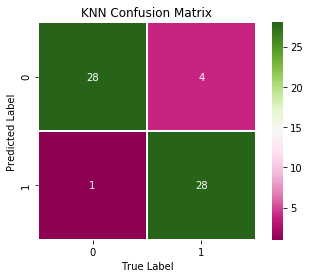

In [41]:
# view the confusion matrix
knn_mat = confusion_matrix(Y_test, knn_predict)
sns.heatmap(knn_mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("KNN Confusion Matrix");

<br/>

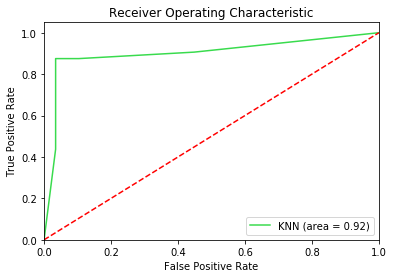

In [42]:
# plot the ROC curve
knn_roc_auc = roc_auc_score(Y_test, knn_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="KNN (area = %0.2f)" % knn_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [43]:
# create a new KNN model
knn_cv_model = KNeighborsClassifier(n_neighbors=5)

# train the model 
knn_cv_scores = cross_val_score(knn_cv_model, X_train, Y_train, cv=5)

# print each cv score (accuracy) and average them
print(knn_cv_scores)
print("KNN cross validation mean:{: .2%}".format(np.mean(knn_cv_scores)))

[0.73469388 0.87755102 0.85416667 0.85416667 0.80851064]
KNN cross validation mean: 82.58%


<br/><b>Hyperparameters Tuned</b>

In [44]:
# create the classifier
knn_grid = KNeighborsClassifier()

# set the hyperparameters
params = {'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,55],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

# make the model
knn_grid_model = GridSearchCV(knn_grid, param_grid=params, n_jobs=1, cv=5)

# train the model
knn_grid_model.fit(X_train, Y_train)

# print the best hyperparameters
print("Best Hyperparameters for KNN:\n",knn_grid_model.best_params_)

# predict the outputs
knn_prediction = knn_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(knn_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(knn_prediction, Y_test))

Best Hyperparameters for KNN:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9180327868852459
Confusion Metrix:
 [[28  4]
 [ 1 28]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: no change in accuracy of original model.</i>

<br/><b>Permutation Feature Importance</b>

In [45]:
# check permutation feature importance to see which features are most important
knn_perm = PermutationImportance(knn_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(knn_perm, feature_names=["age", "sex", "cp", "trestbps", 
                                       "chol", "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.0787 ± 0.0321,ca
0.0721 ± 0.0572,thal
0.0557 ± 0.0334,trestbps
0.0525 ± 0.0321,age
0.0492 ± 0.0359,sex
0.0361 ± 0.0245,slope
0.0361 ± 0.0321,thalach
0.0361 ± 0.0245,restecg
0.0295 ± 0.0382,oldpeak
0.0295 ± 0.0131,fbs



***

### <b>Model: Logistic Regression</b>

<b>Model Created</b><br/>

In [46]:
# create the classifier
lr_model = LogisticRegression(solver="liblinear")

# train the model
lr_model.fit(X_train, Y_train)

# predict the outputs
lr_predict = lr_model.predict(X_test)

<br/><b>Model Evaluated</b>

In [47]:
# evalute the accuracy
lr_accuracy = round(accuracy_score(Y_test, lr_predict)*100, 2)
lr_f1 = round(f1_score(Y_test, lr_predict, average="weighted"), 2)

# print the results
print("Logistic Regression model accuracy:", str(lr_accuracy)+'%')
print("Logistic Regression model F1 score:", lr_f1)

Logistic Regression model accuracy: 81.97%
Logistic Regression model F1 score: 0.82


<br/>

In [48]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(lr_predict, Y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



<br/>

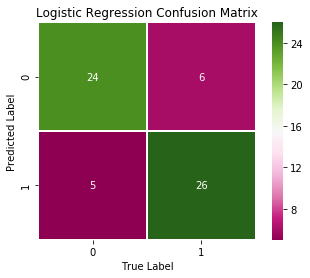

In [49]:
# view the confusion matrix
lr_mat = confusion_matrix(Y_test, lr_predict)
sns.heatmap(lr_mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Logistic Regression Confusion Matrix");

<br/>

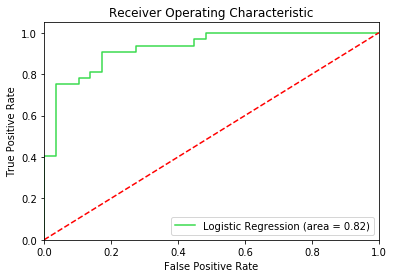

In [50]:
# plot the ROC curve
lr_roc_auc = roc_auc_score(Y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % lr_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [51]:
# create a new logistic regression model
lr_cv_model = LogisticRegression(solver="liblinear")

# train the model 
lr_cv_scores = cross_val_score(lr_cv_model, X_train, Y_train, cv=5)

# print each cv score (accuracy) and average them
print(lr_cv_scores)
print("Logistic Regression cross validation mean:{: .2%}".format(np.mean(lr_cv_scores)))

[0.81632653 0.95918367 0.83333333 0.85416667 0.76595745]
Logistic Regression cross validation mean: 84.58%


<br/><b>Hyperparameters Tuned</b>

In [52]:
# create the classifier
lr_grid = LogisticRegression(solver="liblinear")

# set the hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# make the model
lr_grid_model = GridSearchCV(lr_grid, param_grid=params, n_jobs=1, cv=5)

# train the model
lr_grid_model.fit(X_train, Y_train)

# print the best hyperparameters
print("Best Hyper Parameters for Logistic Regression:\n",lr_grid_model.best_params_)

# predict the outputs
lr_prediction = lr_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(lr_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(lr_prediction, Y_test))

Best Hyper Parameters for Logistic Regression:
 {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8524590163934426
Confusion Metrix:
 [[25  5]
 [ 4 27]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: accuracy improved from 81.97% on inital model to 85.25%.</i>

<br/><b>Permutation Feature Importance</b>

In [53]:
# check permutation importance to see which features are most important
lr_perm = PermutationImportance(lr_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(lr_perm, feature_names=["age", "sex", "cp", "trestbps", 
                                       "chol", "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.0328 ± 0.0415,cp
0.0295 ± 0.0382,sex
0.0230 ± 0.0608,ca
0.0033 ± 0.0482,exang
-0.0033 ± 0.0840,thal
-0.0066 ± 0.0161,fbs
-0.0098 ± 0.0161,age
-0.0131 ± 0.0525,slope
-0.0131 ± 0.0382,thalach
-0.0131 ± 0.0131,chol


***

### <b>Model: Random Forest</b>

<b>Model Created</b><br/>

<i>Note: n_estimators of 0, 50, and 100 were initially tried as a starting point.</i>

In [54]:
# create the classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# train the model
rf_model.fit(X_train, Y_train)

# predict the outputs
rf_predict = rf_model.predict(X_test)


<br/><b>Model Evaluated</b>

In [55]:
# evalute the accuracy
rf_accuracy = round(accuracy_score(Y_test, rf_predict)*100, 2)
rf_f1 = round(f1_score(Y_test, rf_predict, average="weighted"), 2)

# print the results
print("Random Foreset model accuracy:", str(rf_accuracy)+'%')
print("Random Forest model F1 score:", rf_f1)

Random Foreset model accuracy: 90.16%
Random Forest model F1 score: 0.9


<br/>

In [56]:
# view the classification report
# no disease = 0; disease = 1
print(classification_report(rf_predict, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.88      0.93      0.90        30

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<br/>

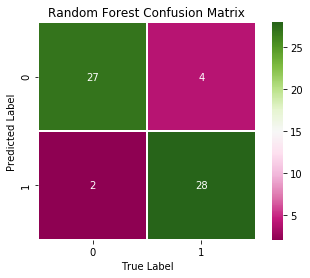

In [58]:
# view the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, rf_predict)
sns.heatmap(mat.T, annot=True, cmap="PiYG", square=True, linewidths=.5)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Random Forest Confusion Matrix");

<br/>

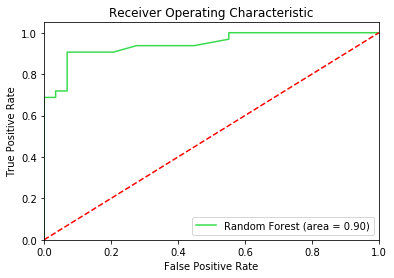

In [59]:
# plot the ROC curve
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Random Forest (area = %0.2f)" % rf_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show();

<br/><b>Cross Validation</b>

In [60]:
# create a new random forest model
rf_cv_model = RandomForestClassifier(n_estimators=50, random_state=42)

# train the model 
rf_cv_scores = cross_val_score(rf_cv_model, X_train, Y_train, cv=5)

# print each cv score (accuracy) and average them
print(rf_cv_scores)
print("Random Forest cross validation mean:{: .2%}".format(np.mean(rf_cv_scores)))

[0.7755102  0.85714286 0.83333333 0.8125     0.74468085]
Random Forest cross validation mean: 80.46%


<br/><b>Hyperparameters Tuned</b>

In [61]:
# create the classifier
rf_grid = RandomForestClassifier(random_state=42)

# set the hyperparameters
params = {'bootstrap': [True, False], 
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10], 
           'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# make the model
rf_grid_model = GridSearchCV(rf_grid, param_grid=params, cv=5)

# train the model
rf_grid_model.fit(X_train, Y_train)

# print best hyperparameters
print("Best Hyper Parameters for Random Forest:\n",rf_grid_model.best_params_)

# predictthe outputs
rf_prediction = rf_grid_model.predict(X_test)

# print the results
print("Accuracy:", accuracy_score(rf_prediction, Y_test))
print("Confusion Metrix:\n", confusion_matrix(rf_prediction, Y_test))

Best Hyper Parameters for Random Forest:
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9016393442622951
Confusion Metrix:
 [[27  4]
 [ 2 28]]


C:\Users\veron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<i>Result: no change in accuracy when compared to the original model.</i>

<br/><b>Permutation Feature Importance</b>

In [215]:
# check permutation importance to see which features are most important
rf_perm = PermutationImportance(rf_model, random_state=42).fit(X_test, Y_test)
eli5.show_weights(rf_perm, feature_names=["age", "sex", "cp", "trestbps", "chol", 
                                       "fbs", "restecg", "thalach", "exang", 
                                       "oldpeak", "slope", "ca", "thal"])

Weight,Feature
0.1082 ± 0.0572,ca
0.0590 ± 0.0675,cp
0.0492 ± 0.0359,slope
0.0426 ± 0.0736,thal
0.0361 ± 0.0131,sex
0.0328 ± 0.0207,age
0.0295 ± 0.0382,thalach
0.0295 ± 0.0482,oldpeak
0.0230 ± 0.0334,exang
0.0230 ± 0.0161,fbs


***


## <b>Summary of Results</b>

The objective of this supervised learning problem was to predict whether or not a patient had heart disease. The models explored for this binary classification were K-Nearest Neighbors, Logistic Regression, and Random Forest. After scaling the features and training each model, the performance was evaluated with several metrics. Accuracy and F1 scores are listed below.



| <b>Model</b>          | <b>Accuracy<br/>(Before Tuning)</b> | <b>F1 Score<br/>(Before Tuning)</b> |<b>Accuracy<br/>(After Tuning)</b> |
|-----------------------|------------------------------------:|------------------------------------:|----------------------------------:|
| K-Nearest Neighbors   |    91.8%                            |    .92                              | 91.8%                             |
| Random Forest         |    90.16%                           |    .90                              | 90.16%                            |
| Logistic Regression   |    81.97%                           |    .82                              | 84.58%                            |


While K-Nearest Neighbors and Random Forest did not improve with hyperparameter tuning, Logistic Regression showed an increase in accuracy from 81.97% to 84.58%. 

Considering both the accuracy and F1 scores, the classification report, and the confusion matrix, K-Nearest Neighbors out performed the other models. The KNN model was able to accurately predict the target label in 91.8% of the test observations. It also had the fewest number of false negatives and false positives.

Random Forest was a close second, followed by Logist Regression. 